In [1]:
import requests
import pandas as pd
from missingno import missingno

# from matplotlib import gridspec
# import matplotlib.pyplot as plt
# import numpy as np

In [2]:
%matplotlib inline

In [3]:
def download_file(url, filename):
    """
    Helper method handling downloading large files from `url` to `filename`. Returns a pointer to `filename`.
    """
    r = requests.get(url, stream=True)
    with open(filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
    return filename

In [4]:
dat = download_file("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD",
                    "NYPD Motor Vehicle Collisions.csv")
dat_df = pd.read_csv(dat, index_col=23)
pd.set_option('display.max_columns', None)

In [5]:
df_100 = dat_df.sample(100)
df_1000 = dat_df.sample(1000)

In [6]:
# df_100 = pd.read_csv("100 point sample.csv")

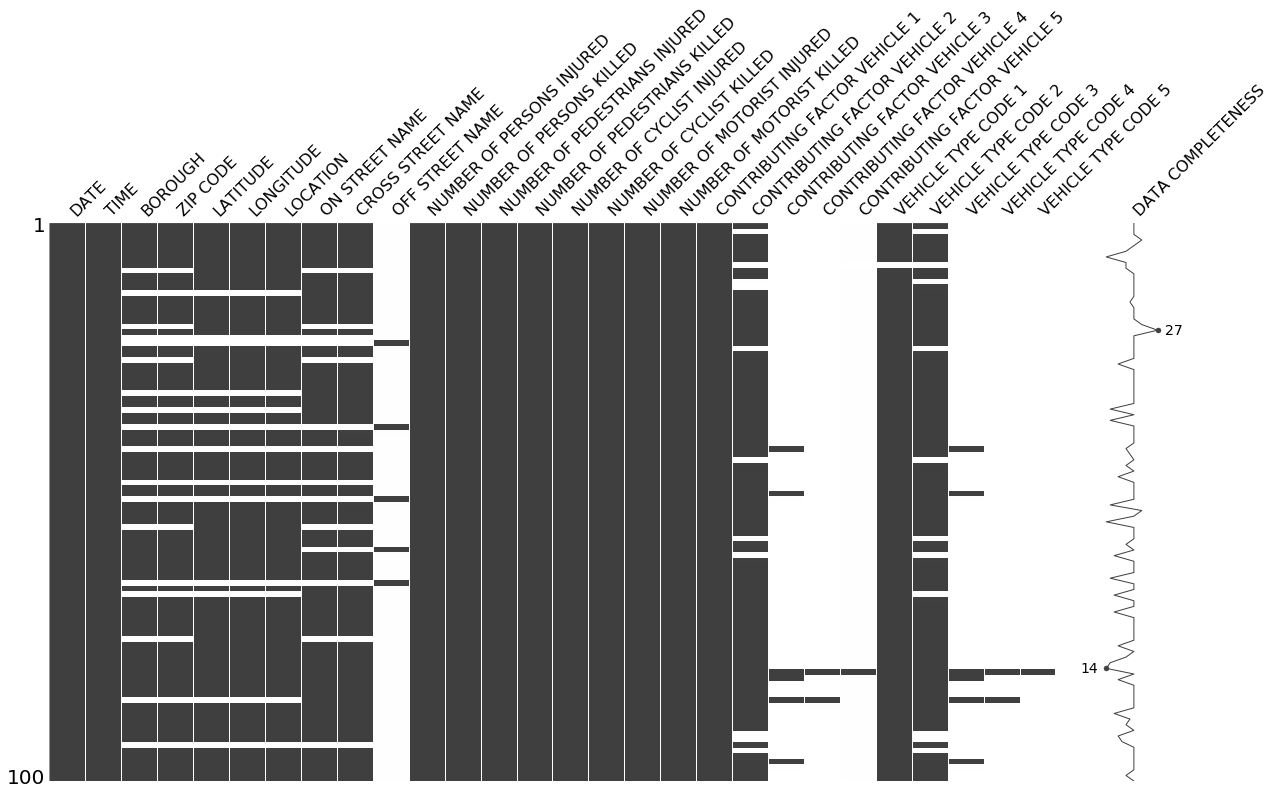

In [220]:
missingno(df_100, color=[0.25, 0.25, 0.25])

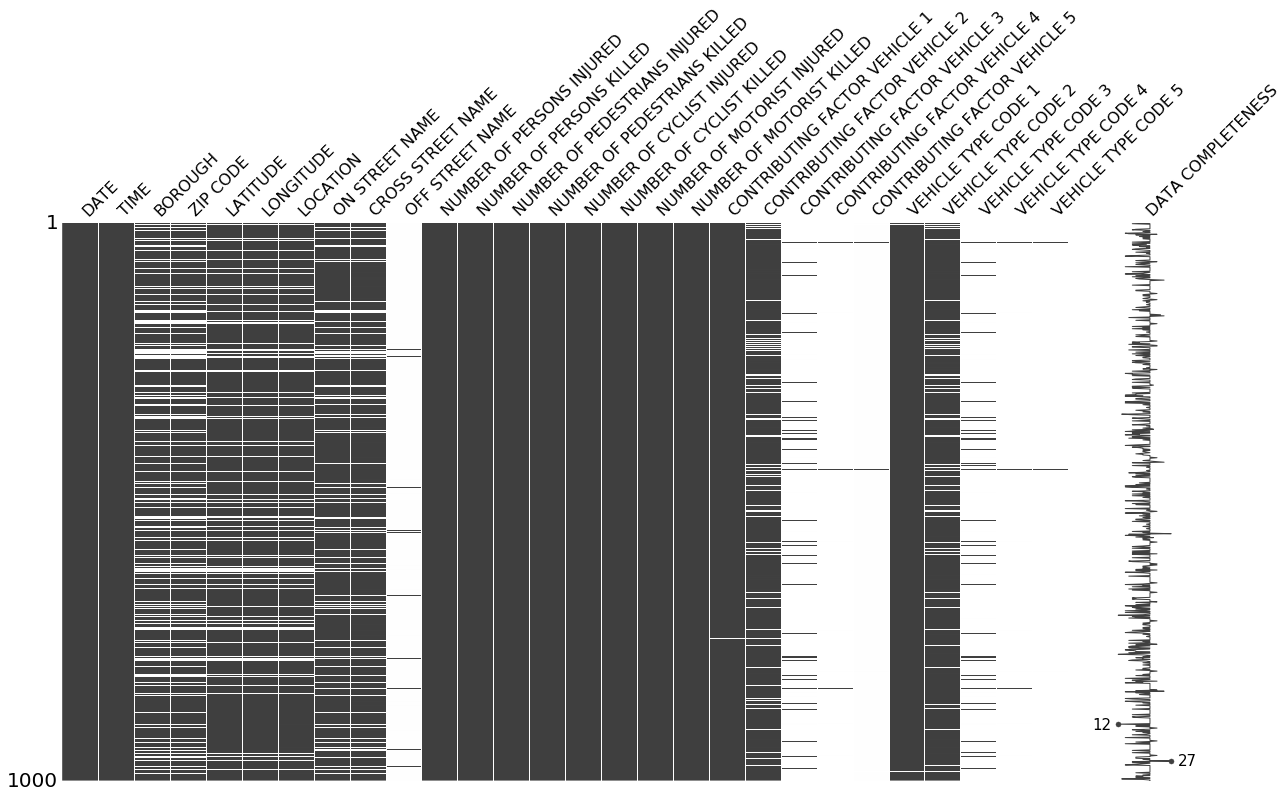

In [215]:
missingno(df_1000)